In [ ]:
!pip install researchpy

In [ ]:
import researchpy as rp
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

file_path = os.path.join('/content/drive/My Drive/Colab Notebooks', 'cust_seg.csv')
df = pd.read_csv(file_path)

In [ ]:
df

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


1. Lakukan analisis eksplorasi Data pada dataset tersebut dan berikan penjelasan dan visualisasinya menggunakan python:

   a. Jalankan fungsi-fungsi dasar: info(), describe(), dan sebagainya.


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


(200, 10)

Data terdiri atas 200 baris dan 10 kolom. Adapun 10 kolom seluruhnya telah terisi/ non-null dengan 8 tipe data int64 dan 2 tipe data float64

In [ ]:
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


Highlight to discuss

*   Standar deviasi tertinggi di antara kolom 'pre_usage', 'Post_usage_1month', 'Latest_mon_usage', 'post_usage_2ndmonth', yaitu ada pada kolom lates_mon_usage, yang mana memiliki std = 11.24 dengan nilai min = 39.6, max=90,dan mean = 63.17. Baik nilai minimal, maximal, dan mean meningkat dari masing-masing komponen serupa pada kolom 'pre_usage'
*   Peningkatan secara proporsional tampak pada komponen mean, std, min, max, quartile, pada kolom 'pre_usage', 'Latest_mon_usage', 'post_usage_2ndmonth', hingga  'Post_usage_1month'
*   Namun demikian, nilai stadev yang meningkat, perlu dilakukan analisa terhadap kemungkinan adanya outlier minor dan mayor pada dataset



In [ ]:
# Kolom yang akan diuji untuk outlier
kolom_uji = ['pre_usage', 'Post_usage_1month', 'Latest_mon_usage', 'post_usage_2ndmonth']

# Menghitung kuartil
Q1 = df[kolom_uji].quantile(0.25)
Q3 = df[kolom_uji].quantile(0.75)

# Menghitung Rentang Interkuartil (IQR)
IQR = Q3 - Q1

# Mendeteksi outlier dengan inner fences
inner_lower_bound = Q1 - 1.5 * IQR
inner_upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier dengan outer fences
outer_lower_bound = Q1 - 3 * IQR
outer_upper_bound = Q3 + 3 * IQR

# Menampilkan outlier
inner_outliers = ((df[kolom_uji] < inner_lower_bound) | (df[kolom_uji] > inner_upper_bound)).sum()
outer_outliers = ((df[kolom_uji] < outer_lower_bound) | (df[kolom_uji] > outer_upper_bound)).sum()

print("Jumlah outlier dalam setiap kolom (Inner Bound):")
print(inner_outliers)

print("\nJumlah outlier dalam setiap kolom (Outer Bound):")
print(outer_outliers)

Jumlah outlier dalam setiap kolom (Inner Bound):
pre_usage              0
Post_usage_1month      0
Latest_mon_usage       0
post_usage_2ndmonth    0
dtype: int64

Jumlah outlier dalam setiap kolom (Outer Bound):
pre_usage              0
Post_usage_1month      0
Latest_mon_usage       0
post_usage_2ndmonth    0
dtype: int64


In [ ]:
print(df.nunique())

custid                 200
sex                      2
AqChannel                4
region                   3
Marital_status           2
segment                  3
pre_usage               30
Post_usage_1month       29
Latest_mon_usage        40
post_usage_2ndmonth     29
dtype: int64


In [ ]:
for column in df.columns:
    if column not in ['custid', 'pre_usage', 'Post_usage_1month', 'Latest_mon_usage', 'post_usage_2ndmonth']:
        unique_values = df[column].unique()
        value_counts = df[column].value_counts()
        print(f"Unique values in column '{column}':\n{unique_values}\n")
        print(f"Value counts in column '{column}':\n{value_counts}\n")

Unique values in column 'sex':
[0 1]

Value counts in column 'sex':
1    109
0     91
Name: sex, dtype: int64

Unique values in column 'AqChannel':
[4 3 1 2]

Value counts in column 'AqChannel':
4    145
1     24
3     20
2     11
Name: AqChannel, dtype: int64

Unique values in column 'region':
[1 2 3]

Value counts in column 'region':
2    95
3    58
1    47
Name: region, dtype: int64

Unique values in column 'Marital_status':
[1 2]

Value counts in column 'Marital_status':
1    168
2     32
Name: Marital_status, dtype: int64

Unique values in column 'segment':
[1 3 2]

Value counts in column 'segment':
2    105
3     50
1     45
Name: segment, dtype: int64



b. Buat histogram untuk melihat persebaran data beberapa variable yang menurut Anda penting.

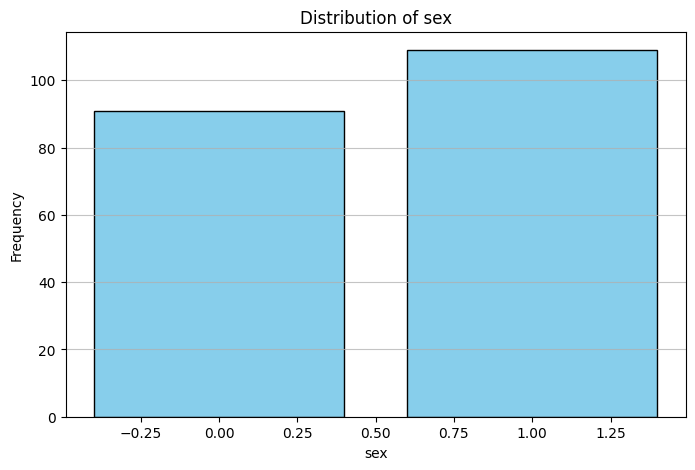

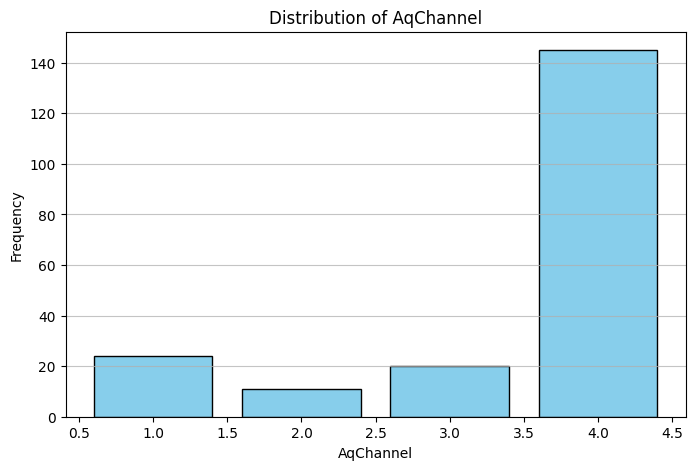

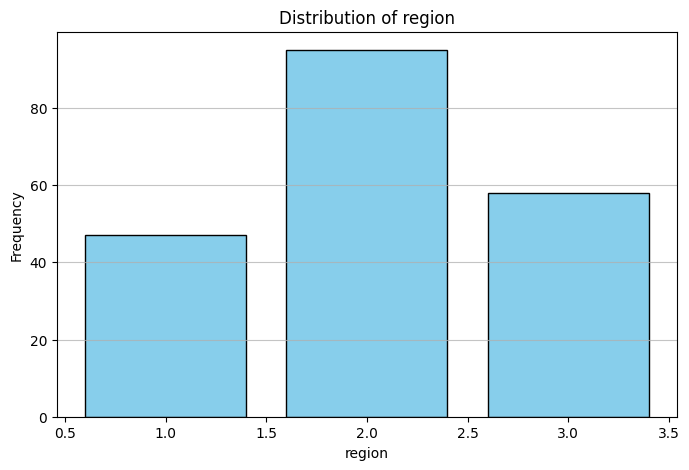

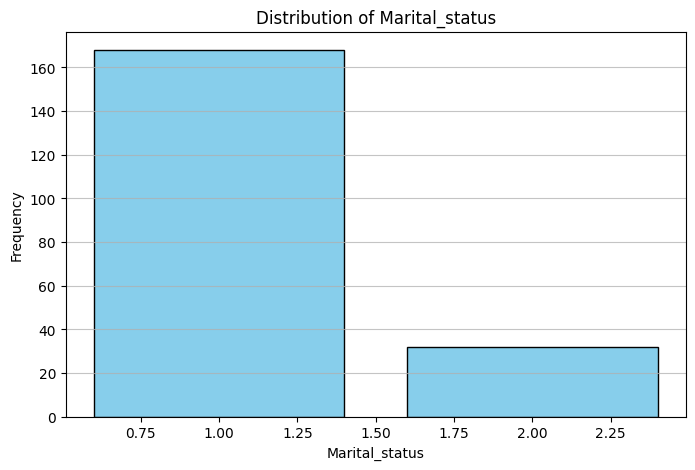

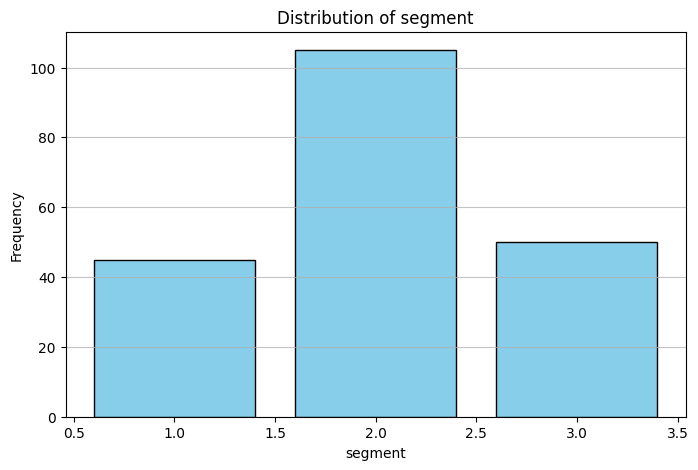

In [ ]:
# Kolom yang akan diplot
kolom_diplot = ['sex', 'AqChannel', 'region', 'Marital_status', 'segment']

# Membuat diagram batang untuk setiap kolom
for column in kolom_diplot:
    plt.figure(figsize=(8, 5))
    plt.bar(df[column].value_counts().index, df[column].value_counts().values, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    print('\n')

Berdasarkan gambar, customer yang memiliki gender perempuan dan status pernikahan single memiliki jumlah lebih tinggi dibandingkan gender laki-laki dan status pernikahan menikah.

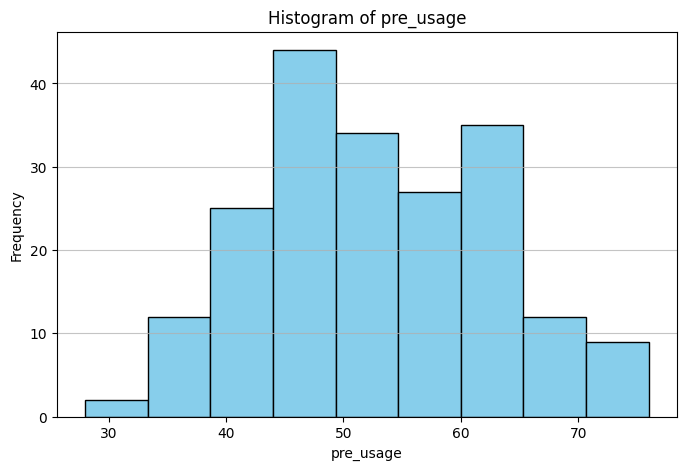

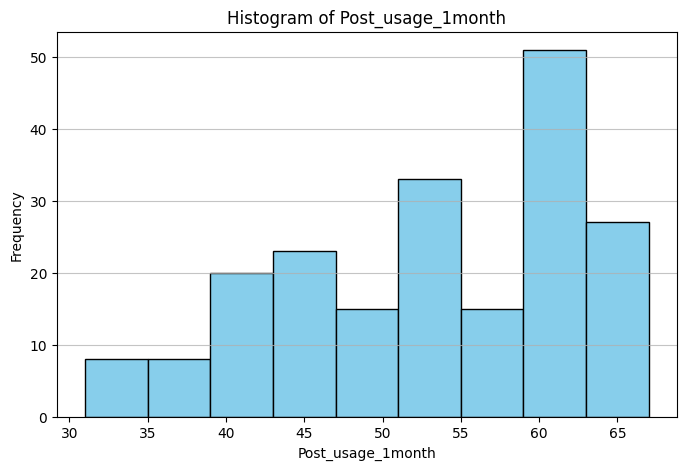

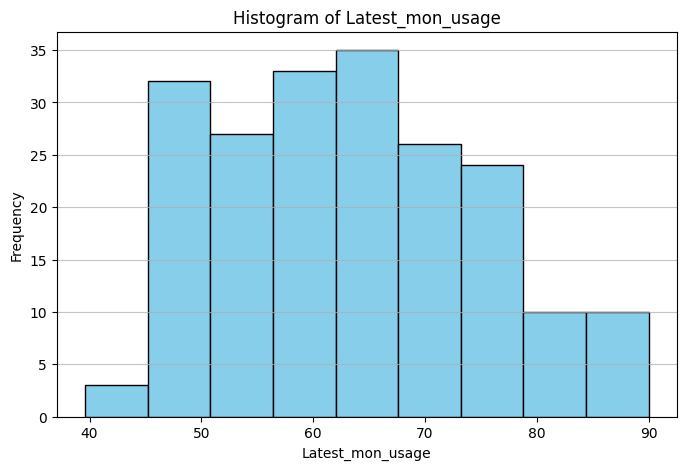

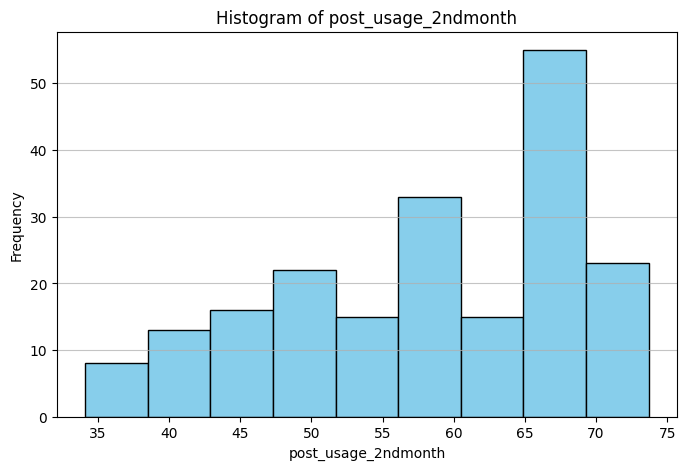

In [ ]:
# Kolom yang akan diplot
kolom_numerik = ['pre_usage', 'Post_usage_1month', 'Latest_mon_usage', 'post_usage_2ndmonth']

# Membuat histogram untuk setiap kolom numerik
for column in kolom_numerik:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    print('\n')

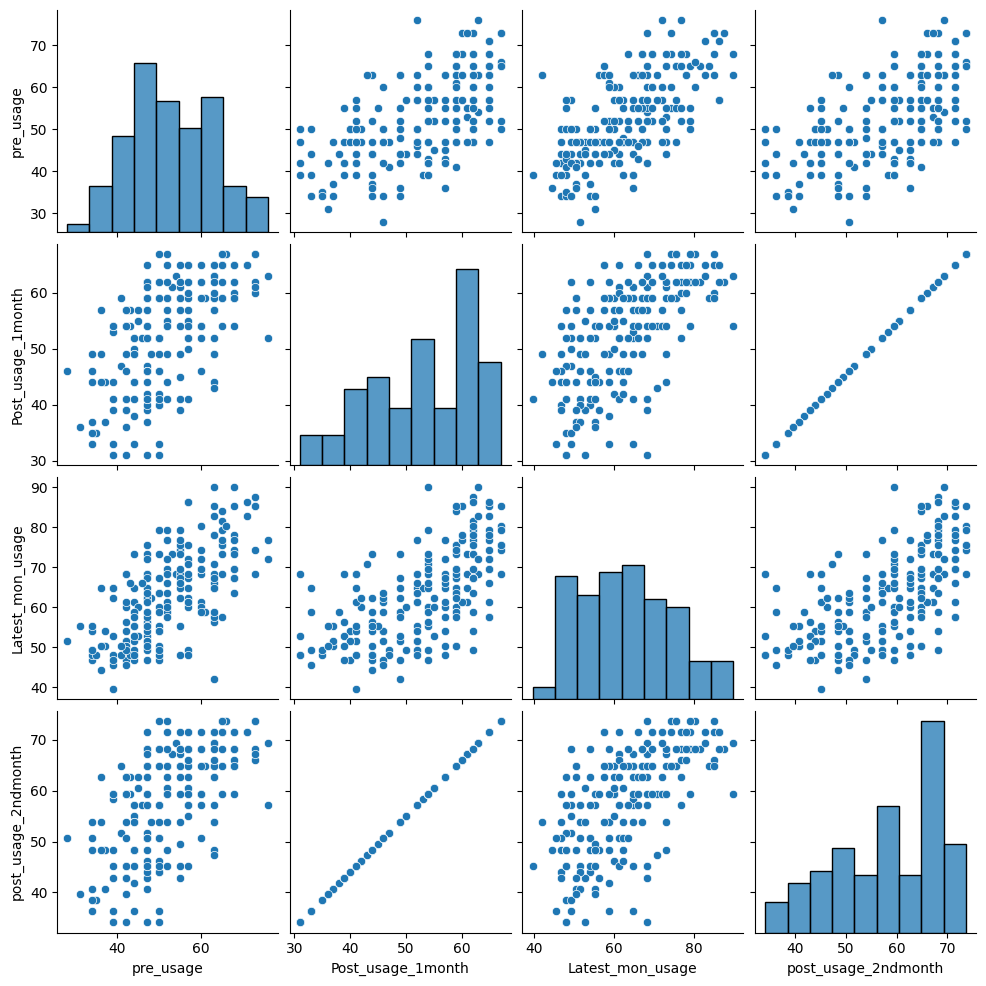

In [ ]:
# Membuat pair plot untuk variabel numerik
sns.pairplot(df[kolom_numerik])
plt.show()



Berdasarkan gambar, tampak bahwa
*   Penggunaan kartu kredit sebelum kampanye memiliki distribusi yang simetris, dengan nilai rata-rata dan median yang sama, yaitu 1000.
*   Setelah kampanye, penggunaan kartu kredit mengalami peningkatan, dengan nilai rata-rata dan median yang meningkat menjadi 1020 dan 1040, masing-masing
*   Peningkatan ini terlihat lebih jelas pada histogram penggunaan kartu kredit setelah kampanye, yang memiliki distribusi yang sedikit miring ke kanan.
*   Peningkatan penggunaan kartu kredit ini menunjukkan bahwa kampanye yang dilakukan berhasil meningkatkan kesadaran masyarakat akan kartu kredit.

2. Lakukan uji hipotesis untuk melihat apakah kampanye yang dilakukan berhasil. (Hint: gunakan fungsi est_rel):

   a. Bandingkan penggunaan kartu kredit antara sebelum kampanye dengan 1 bulan setelah kampanye.
   

In [ ]:
df.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [ ]:
df_1month=pd.DataFrame({'pre_usage': df['pre_usage'], 'Post_usage_1month': df['Post_usage_1month']})
df_1month

,pre_usage,Post_usage_1month
0,57,52
1,68,59
2,44,33
3,63,44
4,47,52
...,...,...
195,55,59
196,42,46
197,57,41
198,55,62


H0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan 1 bulan setelah kampanye.

H1 : Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan 1 bulan setelah kampanye.

        Normality Check

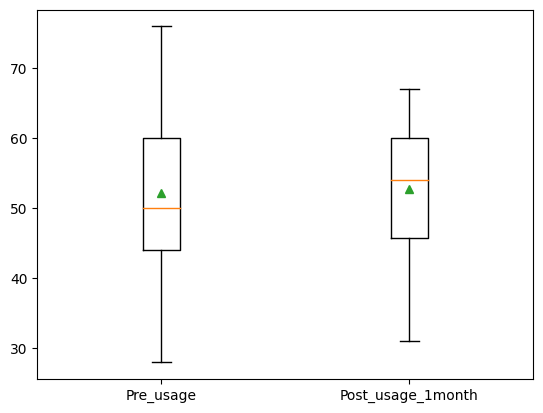

In [ ]:
plt.boxplot([df_1month.pre_usage, df_1month.Post_usage_1month], labels=['Pre_usage', 'Post_usage_1month'], showmeans=True);

In [ ]:
df_1month['residu'] = df_1month.pre_usage - df_1month.Post_usage_1month
df_1month

,pre_usage,Post_usage_1month,residu
0,57,52,5
1,68,59,9
2,44,33,11
3,63,44,19
4,47,52,-5
...,...,...,...
195,55,59,-4
196,42,46,-4
197,57,41,16
198,55,62,-7


<ipython-input-137-79a47d51be55>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residu, shade=True)


<Axes: xlabel='residu', ylabel='Density'>

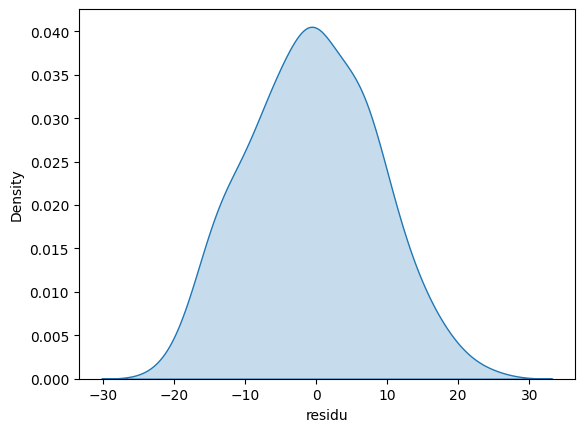

In [ ]:
residu = df_1month['residu']
sns.kdeplot(residu, shade=True)

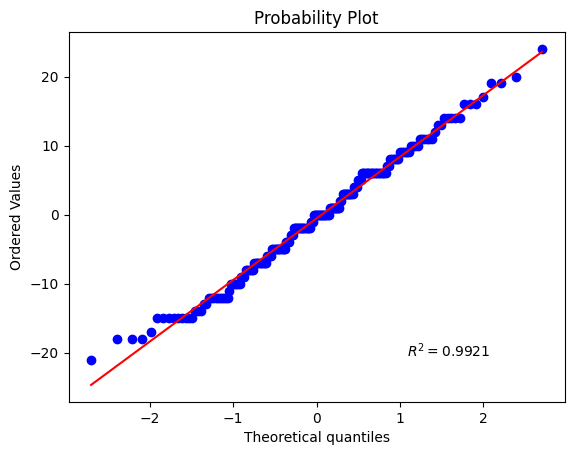

In [ ]:
# Probabilistic Plot
stats.probplot(residu, plot=plt, rvalue=True);

In [ ]:
# Uji Saphiro
stats.shapiro(residu)

ShapiroResult(statistic=0.9903692007064819, pvalue=0.20218688249588013)

P-value = 0.20 > 0,05, maka tidak terdapat bukti yang kuat untuk menolak H0, maka kesmpulannya distribusinya normal

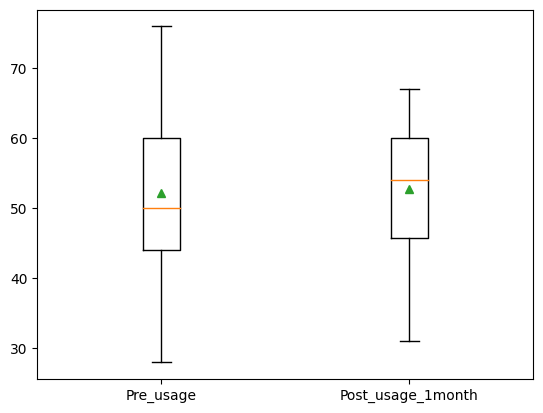

In [ ]:
plt.boxplot([df_1month.pre_usage, df_1month.Post_usage_1month], labels=['Pre_usage', 'Post_usage_1month'], showmeans=True);

        Homogenity Check

In [ ]:
stats.levene(df_1month.pre_usage, df_1month.Post_usage_1month)

LeveneResult(statistic=0.936025414198163, pvalue=0.3338896334768082)

P-value = 0.33 > 0,05, maka tidak terdapat bukti yang kuat untuk menolak H0, maka kesmpulannya memiliki varians yang homogen

        Uji T dengan fungsi ttest_rel

In [ ]:
stats.ttest_rel(df_1month.pre_usage, df_1month.Post_usage_1month)

TtestResult(statistic=-0.8673065458794775, pvalue=0.3868186820914985, df=199)

In [ ]:
from scipy.stats import ttest_rel

# Perform paired sample t-test
t_statistic, p_value = ttest_rel(df_1month.pre_usage, df_1month.Post_usage_1month)

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


T-statistic: -0.8673065458794775
P-value: 0.3868186820914985
Fail to reject the null hypothesis. There is no significant difference.


Berdasarkan hasil uji T, diketahui bahwa p_value = 0.3868 > aplha, sehingga tidak terdapat bukti yang kuat untuk menolak H0, sehingga penggunaan kartu kredit antara sebelum kampanye dengan 1 bulan setelah kampanye tidak terdapat perbedaan signifikan, kampanye dinyatakan tidak berhasil.

2. Lakukan uji hipotesis untuk melihat apakah kampanye yang dilakukan berhasil. (Hint: gunakan fungsi est_rel):

   b. Bandingkan penggunaan kartu kredit antara sebelum kampanye dengan 2 bulan setelah kampanye.
   

In [ ]:
df.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [ ]:
df_2month=pd.DataFrame({'pre_usage': df['pre_usage'], 'post_usage_2ndmonth': df['post_usage_2ndmonth']})
df_2month

,pre_usage,post_usage_2ndmonth
0,57,57.2
1,68,64.9
2,44,36.3
3,63,48.4
4,47,57.2
...,...,...
195,55,64.9
196,42,50.6
197,57,45.1
198,55,68.2


H0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan 2 bulan setelah kampanye.

H1 : Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan 2 bulan setelah kampanye.

        Uji Normalitas

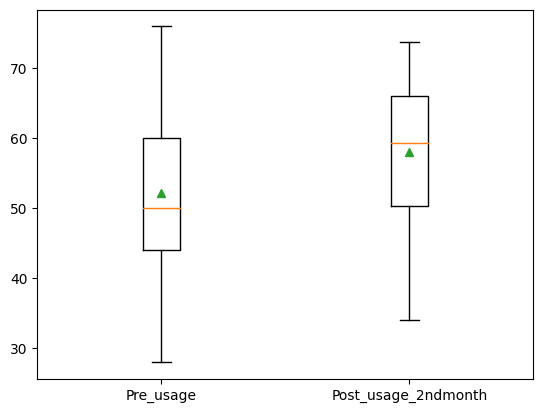

In [ ]:
plt.boxplot([df_2month.pre_usage, df_2month.post_usage_2ndmonth], labels=['Pre_usage', 'Post_usage_2ndmonth'], showmeans=True);

In [ ]:
df_2month['residu'] = df_2month.pre_usage - df_2month.post_usage_2ndmonth
df_2month

,pre_usage,post_usage_2ndmonth,residu
0,57,57.2,-0.2
1,68,64.9,3.1
2,44,36.3,7.7
3,63,48.4,14.6
4,47,57.2,-10.2
...,...,...,...
195,55,64.9,-9.9
196,42,50.6,-8.6
197,57,45.1,11.9
198,55,68.2,-13.2


<ipython-input-148-834e4cc894e1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residu, shade=True)


<Axes: xlabel='residu', ylabel='Density'>

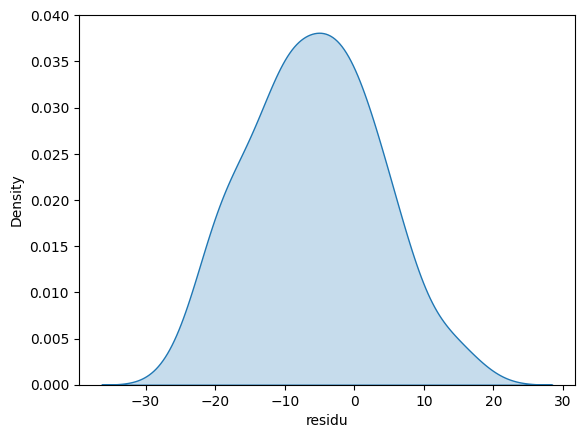

In [ ]:
residu = df_2month['residu']
sns.kdeplot(residu, shade=True)

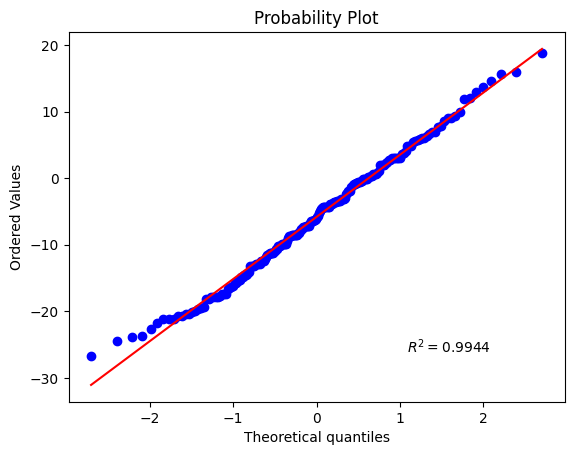

In [ ]:
# Probabilistic Plot

stats.probplot(residu, plot=plt, rvalue=True);

In [ ]:
# Uji Shapiro

stats.shapiro(residu)

ShapiroResult(statistic=0.9922108054161072, pvalue=0.36484774947166443)

P-value = 0.36 > 0,05, maka tidak terdapat bukti yang kuat untuk menolak H0, maka kesmpulannya distribusinya normal

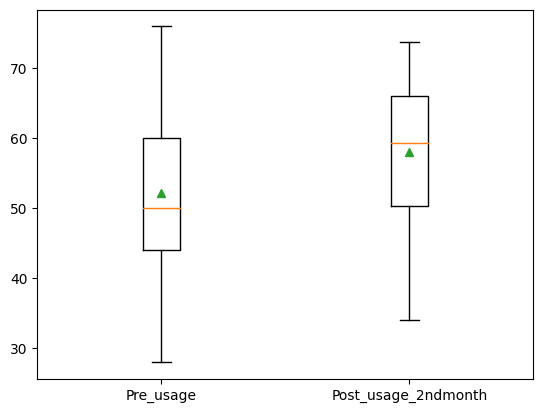

In [ ]:
plt.boxplot([df_2month.pre_usage, df_2month.post_usage_2ndmonth], labels=['Pre_usage', 'Post_usage_2ndmonth'], showmeans=True);

        Homogenity Check

In [ ]:
stats.levene(df_2month.pre_usage, df_2month.post_usage_2ndmonth)

LeveneResult(statistic=0.13075203721122983, pvalue=0.7178454582973319)

P-value = 0.36 > 0,05, maka tidak terdapat bukti yang kuat untuk menolak H0, maka kesmpulannya memiliki varians yang homogen

        Uji T-Test dengan Fungsi ttest_rel

In [ ]:
stats.ttest_rel(df_2month.pre_usage, df_2month.post_usage_2ndmonth)

TtestResult(statistic=-8.866832246938742, pvalue=4.295733828012836e-16, df=199)

In [ ]:
from scipy.stats import ttest_rel

# Perform paired sample t-test
t_statistic, p_value = ttest_rel(df_2month.pre_usage, df_2month.post_usage_2ndmonth)

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


T-statistic: -8.866832246938742
P-value: 4.295733828012836e-16
Reject the null hypothesis. There is a significant difference.


Berdasarkan hasil uji T, diketahui bahwa p_value = 4.295733828012836e-16 < aplha, sehingga terdapat bukti yang kuat untuk menolak H0. Kesimpulannya, penggunaan kartu kredit antara sebelum kampanye dengan 2 bulan setelah kampanye terdapat perbedaan signifikan dan kampanye dinyatakan berhasil.

3. Lakukan uji hipotesis untuk melihat apakah ada perbedaan penggunaan kartu kredit antara kelompok laki-laki dan perempuan setelah kampanye. (Hint: gunakan fungsi ttest_ind):

   a. Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye.

In [ ]:
df.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [ ]:
df_male = df.loc[df['sex'] == 0, 'Post_usage_1month']
df_female = df.loc[df['sex'] == 1, 'Post_usage_1month']

H0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit antara kelompok laki-laki dan perempuan 1 bulan setelah kampanye

H1 : Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara kelompok laki-laki dan perempuan 1 bulan setelah kampanye

        Uji Normalitas dan Homogenitas

        Uji ttest_ind

In [ ]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
t_statistic, p_value = ttest_ind(df_male, df_female, equal_var=False)

# Menampilkan hasil uji
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretasi hasil uji
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Terdapat perbedaan signifikan.")
else:
    print("Fail to reject the null hypothesis. Tidak terdapat perbedaan signifikan.")

T-statistic: -3.656408047887528
P-value: 0.000340884935942662
Reject the null hypothesis. Terdapat perbedaan signifikan.


Berdasarkan hasil uji T, diketahui bahwa p_value = > aplha, sehingga terdapat bukti yang kuat untuk menolak H0. Kesimpulannya, Tidak Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara kelompok laki-laki dan perempuan 1 bulan setelah kampanye.

3. Lakukan uji hipotesis untuk melihat apakah ada perbedaan penggunaan kartu kredit antara kelompok laki-laki dan perempuan setelah kampanye. (Hint: gunakan fungsi ttest_ind):
   
   b. Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye.

In [ ]:
df.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

In [ ]:
# Memisahkan data laki-laki dan perempuan dan menghapus nilai NaN
df_male = df.loc[df['sex'] == 0, 'post_usage_2ndmonth']
df_female = df.loc[df['sex'] == 1, 'post_usage_2ndmonth']

H0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit antara kelompok laki-laki dan perempuan 2 bulan setelah kampanye

H1 : Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara kelompok laki-laki dan perempuan 2 bulan setelah kampanye

Uji Normalitas dan Homogenitas

In [ ]:
from scipy.stats import shapiro, levene

# Uji normalitas
statistic_male, p_value_male = shapiro(df_male)
statistic_female, p_value_female = shapiro(df_female)

# Uji homogenitas varians dengan Levene's Test
statistic_levene, p_value_levene = levene(df_male, df_female)

# Menampilkan hasil uji normalitas
print("Uji Normalitas - Male:")
print("Statistic:", statistic_male)
print("P-value:", p_value_male)
if p_value_male < 0.05:
    print("Reject the null hypothesis. Data male tidak terdistribusi normal.")
else:
    print("Fail to reject the null hypothesis. Data male terdistribusi normal.")

print("\nUji Normalitas - Female:")
print("Statistic:", statistic_female)
print("P-value:", p_value_female)
if p_value_female < 0.05:
    print("Reject the null hypothesis. Data female tidak terdistribusi normal.")
else:
    print("Fail to reject the null hypothesis. Data female terdistribusi normal.")

# Menampilkan hasil uji homogenitas varians
print("\nUji Homogenitas Varians - Levene's Test:")
print("Statistic:", statistic_levene)
print("P-value:", p_value_levene)
if p_value_levene < 0.05:
    print("Reject the null hypothesis. Varians antara kedua kelompok tidak homogen.")
else:
    print("Fail to reject the null hypothesis. Varians antara kedua kelompok homogen.")


Uji Normalitas - Male:
Statistic: 0.9498998522758484
P-value: 0.0015366101870313287
Reject the null hypothesis. Data male tidak terdistribusi normal.

Uji Normalitas - Female:
Statistic: 0.9458567500114441
P-value: 0.00023407681146636605
Reject the null hypothesis. Data female tidak terdistribusi normal.

Uji Homogenitas Varians - Levene's Test:
Statistic: 9.61969072878751
P-value: 0.002205998793222223
Reject the null hypothesis. Varians antara kedua kelompok tidak homogen.


In [ ]:
from scipy.stats import ttest_ind

# Melakukan uji t independen
t_statistic, p_value = ttest_ind(df_male, df_female, equal_var=False)

# Menampilkan hasil uji
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretasi hasil uji
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Terdapat perbedaan signifikan.")
else:
    print("Fail to reject the null hypothesis. Tidak terdapat perbedaan signifikan.")

T-statistic: -3.6564080478875405
P-value: 0.0003408849359426465
Reject the null hypothesis. Terdapat perbedaan signifikan.


Berdasarkan hasil uji T, diketahui bahwa p_value = 0.0003408849359426465 < aplha, sehingga terdapat bukti yang kuat untuk menolak H0. Kesimpulannya, Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara kelompok laki-laki dan perempuan 1 bulan setelah kampanye.